# Binary class dataset: The UCI Breast Cancer Wisconsin (Diagnostic) dataset

##  Preparing the datasets


### Load the Data

In [5]:
import pandas as pd

columns = [
    "ID", "Diagnosis",
    "Radius_Mean", "Texture_Mean", "Perimeter_Mean", "Area_Mean", "Smoothness_Mean",
    "Compactness_Mean", "Concavity_Mean", "Concave_Points_Mean", "Symmetry_Mean", "Fractal_Dimension_Mean",
    "Radius_SE", "Texture_SE", "Perimeter_SE", "Area_SE", "Smoothness_SE",
    "Compactness_SE", "Concavity_SE", "Concave_Points_SE", "Symmetry_SE", "Fractal_Dimension_SE",
    "Radius_Worst", "Texture_Worst", "Perimeter_Worst", "Area_Worst", "Smoothness_Worst",
    "Compactness_Worst", "Concavity_Worst", "Concave_Points_Worst", "Symmetry_Worst", "Fractal_Dimension_Worst"
]

file_path = "data/wdbc.data" 
data = pd.read_csv(file_path, header=None, names=columns)

# Preview 
print(data.head())


         ID Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_Worst  Texture_Worst  Perimeter_Worst  Area_Wor

### Preprocess the Data
Remove the ID column (not useful for classification).

Encode the Diagnosis column:
- M (malignant) → 1
- B (benign) → 0

Separate features and labels.

In [6]:
# Remove ID column
data = data.drop(columns=["ID"])

# Encode Diagnosis column
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

# Separate features and labels
features = data.drop(columns=["Diagnosis"]).values
labels = data["Diagnosis"].values


### Shuffle and Split the Dataset

In [7]:
from sklearn.model_selection import train_test_split

# Splits and stratification
proportions = [0.4, 0.6, 0.8, 0.9]
splits = {}
for prop in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=prop, stratify=labels, random_state=42
    )
    splits[f"{int(prop*100)}_{int((1-prop)*100)}"] = (X_train, X_test, y_train, y_test)


### Visualize Class Distributions

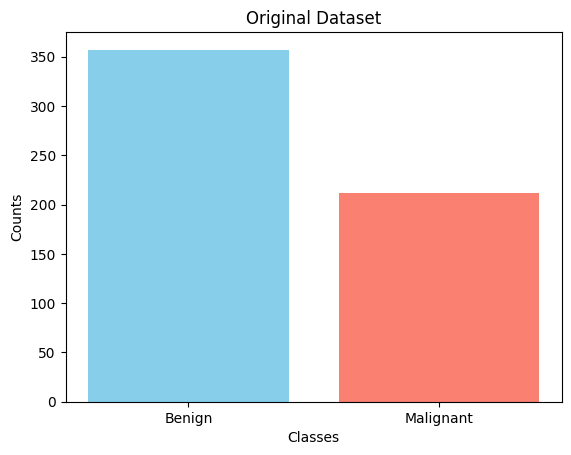

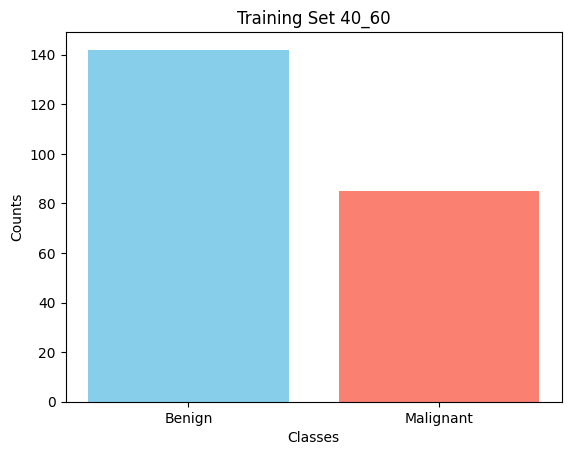

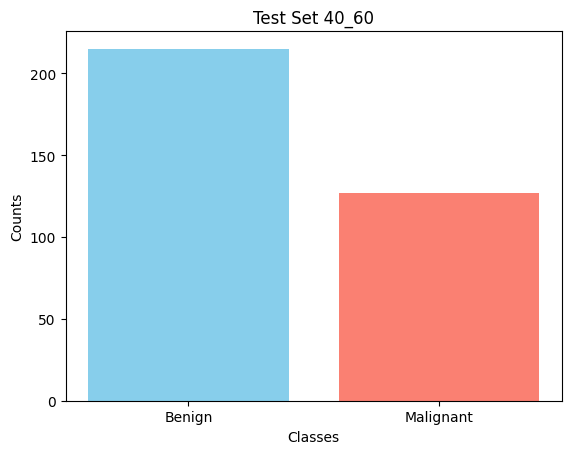

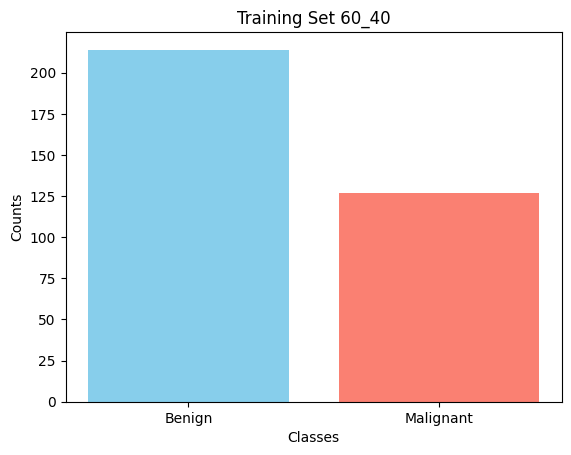

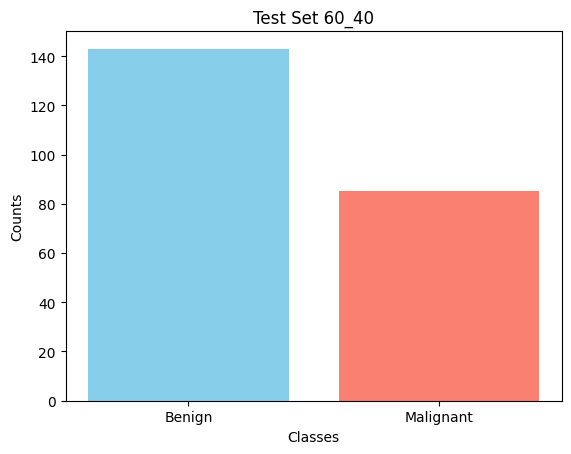

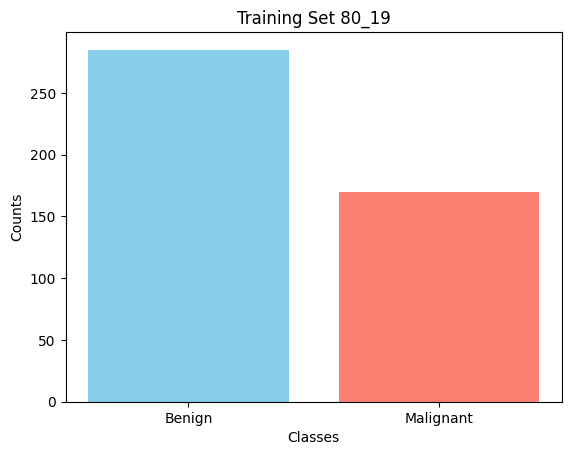

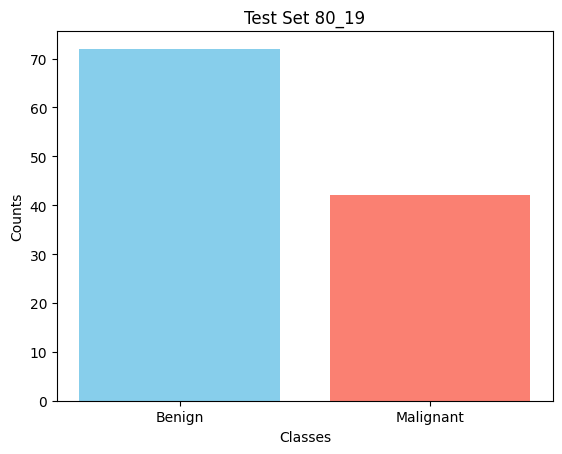

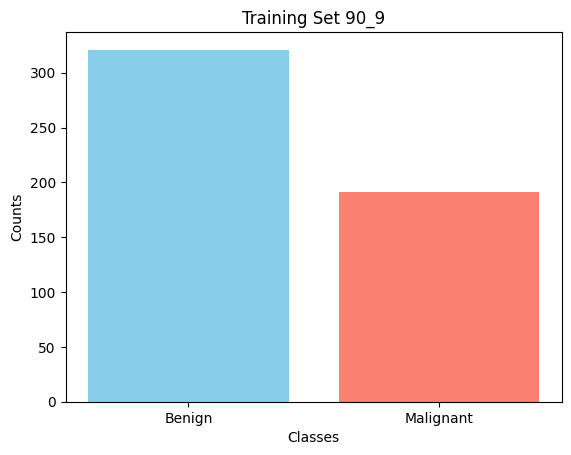

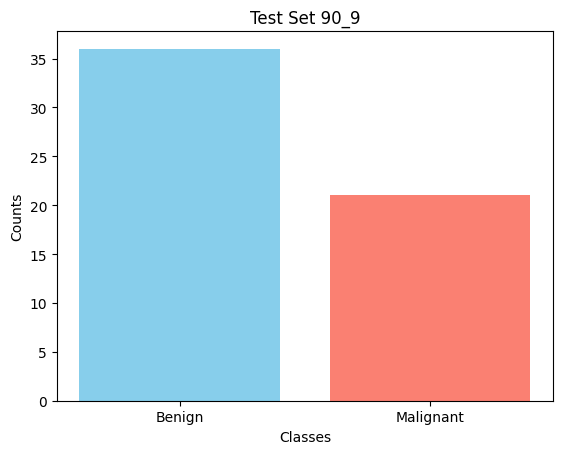

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(title, data_labels):
    unique, counts = np.unique(data_labels, return_counts=True)
    plt.bar(["Benign", "Malignant"], counts, color=["skyblue", "salmon"])
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.show()

# Original dataset
plot_distribution("Original Dataset", labels)

# Each split
for key, (X_train, X_test, y_train, y_test) in splits.items():
    plot_distribution(f"Training Set {key}", y_train)
    plot_distribution(f"Test Set {key}", y_test)
